## LAB<sup>6-2</sup> 꽃받침의 너비와 길이로 결정트리를 만들자

**실습목표**

붓꽃 데이터를 그대로 사용하여 결정 트리를 만들었더니, 꽃잎<sup>petal</sup>의 길이와 너비만이 분류 기준으로 사용되고 있다. 꽃받침<sup>sepal</sup>의 너비와 길이만 가지고 결정 트리를 만들어 보고, 전체 속성을 사용했을 때 왜 이 기준이 선택되지 않았는지 생각해 보자.

1. 데이터를 읽어 첫 두 열만 사용하게 하여 입력 데이터 X를 만든다. 그리고 바로 결정 트리 학습을 실행한다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data[:,:2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

2. 가시화 함수를 사용하여 dot 파일을 생성한다. 이때 사용되는 속성의 이름만을 넘겨준다.

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names[:2],
)

3. 생성된 dot 파일을 jpg 파일로 변환해 그려본다.

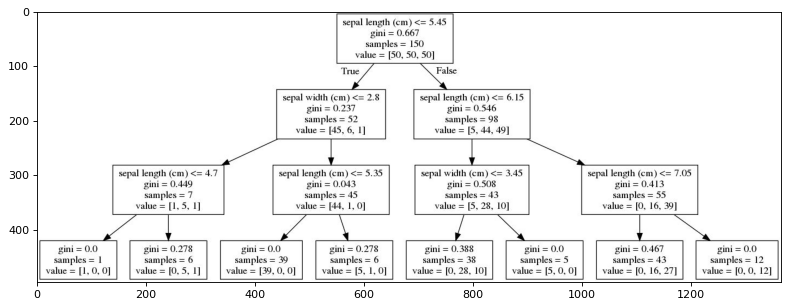

In [3]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

결과에서 확인할 수 있는 것처럼 꽃받침 정보만을 이용하여 결정 트리를 만들었을 경우에는 지나치게 많은 분할이 일어나며, 각 노드의 지니 불순도도 빠르게 감소시키지 못하는 것을 확인할 수 있다. 따라서 이 속성들보다는 **꽃잎**<sup>petal</sup> 정보를 이용하여 결정 트리가 만들어진 것이다.